In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
#display(HTML("<style>.container { font-weight: bold !important; }</style>"))
#display(HTML("<style>.container { width: 98% !important; }</style>"))

# 데이타 전처리(Preprocessing)

- 데이타 클린징
- 결손값 처리 (Null, NaN 처리) 
- 데이터 인코딩 (레이블, 원핫인코딩)
- 데이터 스케일링
- 이상치 제거 
- 피처 선택, 추출 및 가공 

## 데이터 인코딩

- 머신러닝에서의 데이터는 숫자형으로 표현되어야한다. 
- 이를 위해 사이킷런에서 자동으로 숫자값으로 변환되는 API에는 레이블 인코딩과 원핫 인코딩이 있다 

# 레이블 인코딩(Label encoding)

: 사이킷런의 LabelEncoder 이용. 숫자형태로 변경 

- 모듈 임포트
from sklearn.preprocessing import LabelEncoder

- 인코딩 객체 생성 
encoder = LabelEncoder()

- 인코딩객체 fit => 인코딩.fit(타겟리스트) 
encoder.fit(items)

- 인코딩객체 변환및 저장 =>  인코딩.transform(타겟리스트)
labels = encoder.transform(items)

###  판다스의 apply() 활용

- 1) 함수 정의
- 2) apply(함수명)


- apply(lambda 함수정의)

In [3]:
#샘플 데이터프레임 생성
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])
df.sort_values(by='items')

,items
0,TV
1,냉장고
6,믹서
7,믹서
4,선풍기
5,선풍기
2,전자렌지
3,컴퓨터


In [4]:
#인코딩 리스트 생성 -> 가나다순
result = df.sort_values(by='items')['items']
result_list = list(result.unique())
result_list

['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터']

In [5]:
#apply()에 사용할 함수
#item 값이 들어왔을 때 해당 인덱스 반환
def change(item) :
    result_list = ['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터']
    return result_list.index(item)

In [6]:
change('믹서'), change('전자렌지')

(2, 4)

In [7]:
#df[컬럼명].apply(적용함수)
#새로운 컬럼에 인코딩 값 저장
df['Label_encoder'] = df['items'].apply(change)

In [8]:
df

,items,Label_encoder
0,TV,0
1,냉장고,1
2,전자렌지,4
3,컴퓨터,5
4,선풍기,3
5,선풍기,3
6,믹서,2
7,믹서,2


### sklearn 의 LabelEncoder 활용

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
print(dir(LabelEncoder))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'fit', 'fit_transform', 'get_params', 'inverse_transform', 'set_params', 'transform']


In [11]:
#리스트 데이터 -> 인코딩된 리스트 데이터
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

#객체 생성
encoder = LabelEncoder()
#입력데이터를 인코더 객체에 적용
encoder.fit(items)
#인코딩된 결과 데이터를 변수에 저장
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [12]:
#리스트 데이터 -> 인코딩된 리스트 데이터 -> 데이터프레임의 컬럼에 삽입
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

#데이터프레임화
df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])

#객체 생성
encoder = LabelEncoder()

#입력데이터를 인코더 객체에 적용
encoder.fit(items)
 
#인코딩된 결과 데이터를 변수에 저장
labels = encoder.transform(items)

#데이터프레임의 새 컬럼 생성 후 인코딩 데이터 저장
df['Label_encoder'] = labels

In [13]:
df

,items,Label_encoder
0,TV,0
1,냉장고,1
2,전자렌지,4
3,컴퓨터,5
4,선풍기,3
5,선풍기,3
6,믹서,2
7,믹서,2


### LabelEncoder() 의 메서드와 속성 활용 

- 인코딩객체.classes_ : 원본값
- 인코딩객체.inverse_transform() : 메소드 이용 원본값 보기 


In [14]:
print(dir(encoder))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'classes_', 'fit', 'fit_transform', 'get_params', 'inverse_transform', 'set_params', 'transform']


In [15]:
#인코딩객체.classes_ -> 인코딩 전 원본 값의 리스트
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [16]:
#인코딩객체.inverse_transform(인코딩 후의 리스트)
print('디코딩 원본 값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


# 원-핫 인코딩(One-Hot encoding) 

- 원핫인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식이다. 하나만 1로 변환. 최종 2차원으로 변환



### 판다스의 get_dummies()를 이용한 원핫 인코딩

- pd.get_dummies(데이타프레임[컬럼명])
- pd.get_dummies(데이타프레임)

In [17]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])
df

,items
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [18]:
#데이터프레임 전체를 입력값으로 적용
#컬럼명_각 데이터
#각 데이터값에 해당하는 데이터는 1
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [19]:
#데이터프레임의 특정 컬럼을 입력값으로 적용
pd.get_dummies(df['items'])

,TV,냉장고,믹서,선풍기,전자렌지,컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 타이타닉 생존자 예측 

###  데이타셋 
교재에서 제공하는 타이타닉 데이타 이용
data/titanic_book.csv

###  각 피처 설명 
* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [22]:

titanic_df = pd.read_csv('titanic_book.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())

# null 결측치가 있는 피처 확인 - Age, Cabin, Embarked


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


##### NULL 컬럼들에 대한 처리 **

In [24]:
# 평균값으로 대체 
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

#결측치는 'N' 대체
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [25]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### 각 피처의 값의 분포 value_counts()
- 카테고리형 -> Pclass, Sex, Cabin, Embarked

In [26]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
              ... 
B102             1
C101             1
E36              1
D45              1
A23              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


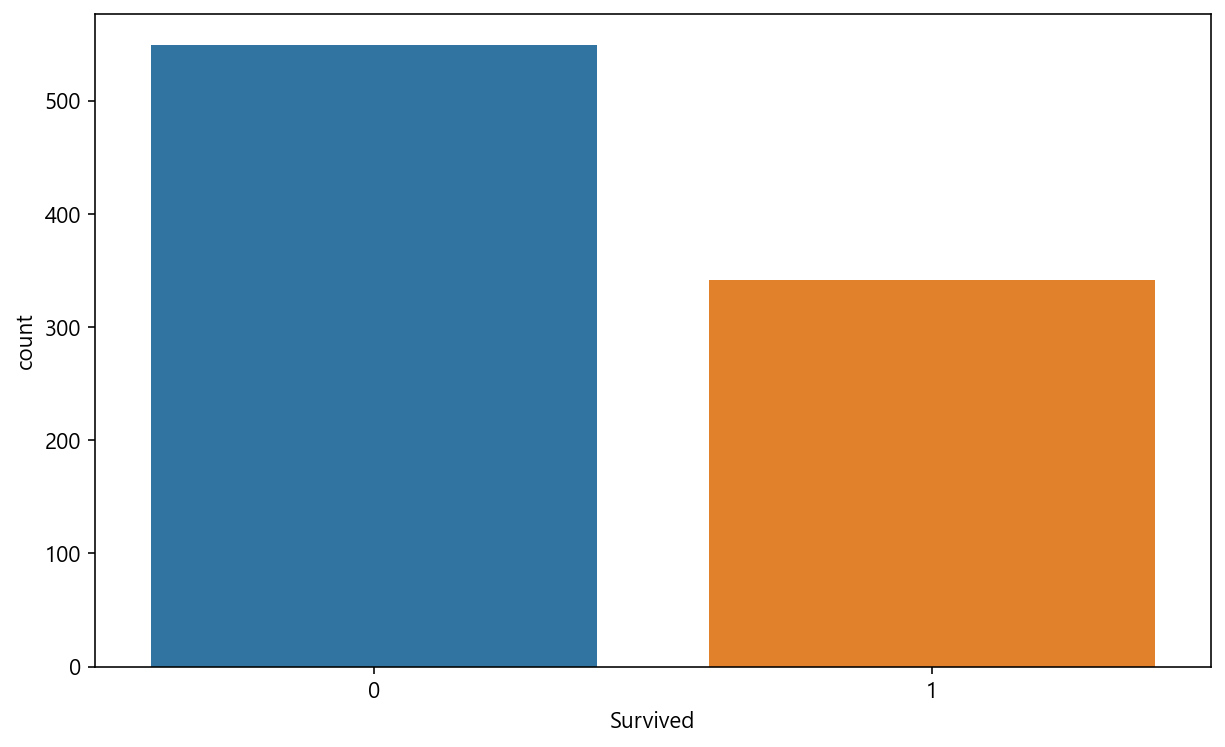

In [27]:
#생존자와 사망자 시각화
sns.countplot(x = 'Survived', data=titanic_df);

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

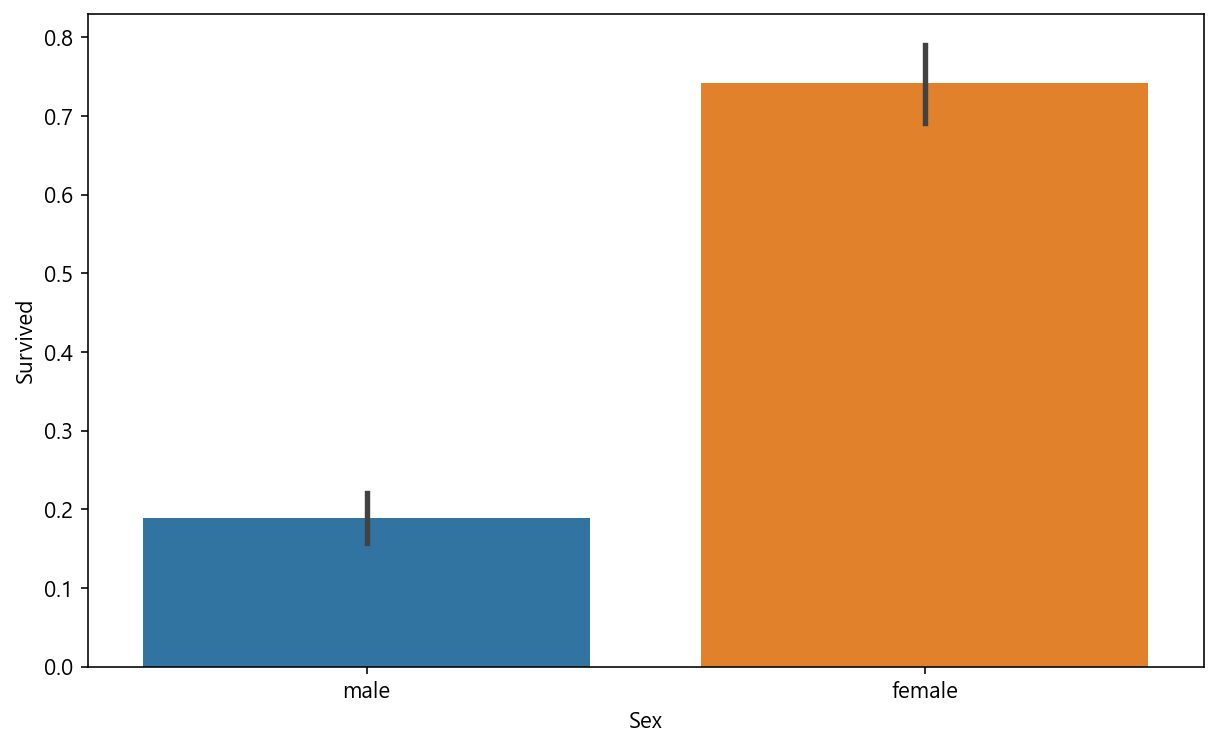

In [28]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

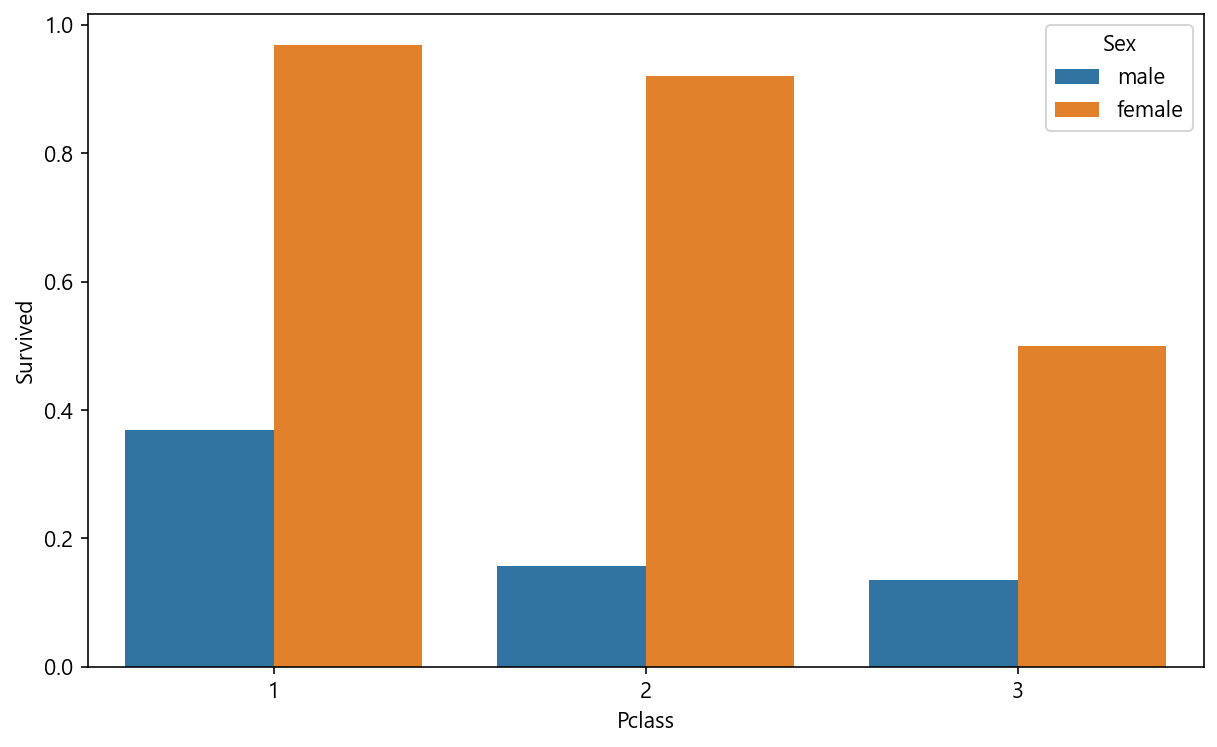

In [30]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', ci=False, data=titanic_df);

### Sex, Embarked  전처리 
- LabelEncoder()로 변환

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
#female -> 0, male -> 1
#객체 생성
encoder = LabelEncoder()

#입력데이터 적용
encoder.fit(titanic_df['Sex'])

#변수로 저장
temp = encoder.transform(titanic_df['Sex'])
temp

titanic_df['Sex'] = temp.reshape(-1, 1)

In [34]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [35]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [36]:
# encoder = LabelEncoder()

#입력데이터 적용
encoder.fit(titanic_df['Embarked'])

#temp로 저장
temp = encoder.transform(titanic_df['Embarked'])

#2차원으로 변경해서 다시 데이터 삽입
titanic_df['Embarked'] = temp.reshape(-1, 1)

In [37]:
titanic_df['Embarked'].value_counts()

3    644
0    168
2     77
1      2
Name: Embarked, dtype: int64

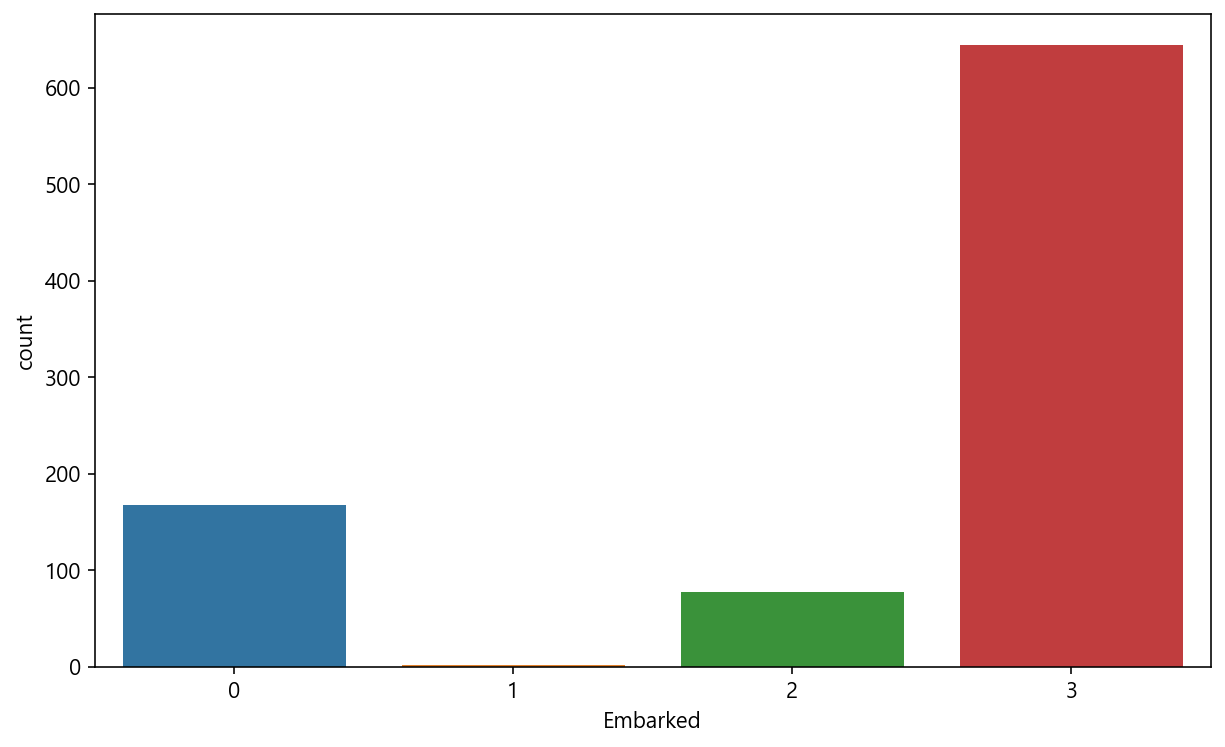

In [38]:
sns.countplot(x='Embarked', data=titanic_df);

### Cabin

In [44]:
titanic_df.loc[298, 'Cabin']

'C'

In [39]:
#Cabin 컬럼에서 첫번째 글자만 추출해서 다시 삽입 변경
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [45]:
titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
823,824,1,3,"Moor, Mrs. (Beila)",0,27.000000,0,1,392096,12.475,E,3
574,575,0,3,"Rush, Mr. Alfred George John",1,16.000000,0,0,A/4. 20589,8.050,N,3
466,467,0,2,"Campbell, Mr. William",1,29.699118,0,0,239853,0.000,N,3


In [46]:
#인코딩된 값을 컬럼에 삽입
encoder.fit(titanic_df['Cabin'])

temp = encoder.transform(titanic_df['Cabin'])

titanic_df['Cabin'] = temp.reshape(-1, 1)

In [47]:
titanic_df['Cabin'].value_counts()

7    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
8      1
Name: Cabin, dtype: int64

## 불필요한 컬럼 삭제 

In [48]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [49]:
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [50]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

### 학습데이타와 테스트데이타셋으로 분리

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [53]:
#X 입력 데이터와 y 타겟 데이터 분리
X_titanic_df = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked']]
y_titanic_df = titanic_df['Survived']

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, 
                                                  test_size=0.2, random_state=11, stratify=y_titanic_df)

In [55]:
X_train.shape, X_test.shape

((712, 8), (179, 8))

In [56]:
X_train.sample(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
193,2,1,3.0,1,1,26.0,5,3
117,2,1,29.0,1,0,21.0,7,3


In [57]:
X_test.sample(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
691,3,0,4.000000,0,1,13.4167,7,0
428,3,1,29.699118,0,0,7.7500,7,2


### 모델에 적용

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [59]:
#모델 객체 생성
model_kn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=11)
model_rf = RandomForestClassifier(random_state=11)


# KNeighborsClassifier 학습/예측/평가
model_kn.fit(X_train , y_train)
print('\n========= KNeighbors' )
print('Train score : ' ,model_kn.score(X_train, y_train))
print('Test score : ' , model_kn.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_kn.predict(X_test)):.4f}')

# LogisticRegression 학습/예측/평가
model_lr.fit(X_train , y_train)
print('\n========= LogisticRegression' )
print('Train score : ' , model_lr.score(X_train, y_train))
print('Test score : ' , model_lr.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_lr.predict(X_test)):.4f}')

# DecisionTreeClassifier 학습/예측/평가
model_dt.fit(X_train , y_train)
print('\n========= DecisionTree' )
print('Train score : ' , model_dt.score(X_train, y_train))
print('Test score : ' , model_dt.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_dt.predict(X_test)):.4f}')

# RandomForest 학습/예측/평가
model_rf.fit(X_train , y_train)
print('\n========= RandomForest' )
print('Train score : ' , model_rf.score(X_train, y_train))
print('Test score : ' , model_rf.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_rf.predict(X_test)):.4f}')



========= KNeighbors
Train score :  0.8033707865168539
Test score :  0.7318435754189944
정확도: 0.7318

========= LogisticRegression
Train score :  0.7949438202247191
Test score :  0.8268156424581006
정확도: 0.8268

========= DecisionTree
Train score :  0.9859550561797753
Test score :  0.7932960893854749
정확도: 0.7933

========= RandomForest
Train score :  0.9859550561797753
Test score :  0.8268156424581006
정확도: 0.8268


# Quiz

타이타닉 데이타셋에서 Age 컬럼을 아래의 함수를 이용하여 세분화하여 추가하고 원핫인코딩 형태 변경하여
<br> 모델의 데이타로 활용하여라. 

In [63]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [64]:
get_category(20)

'Student'

In [474]:
# 결과 예시 
titanic_df2.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Adult,Baby,Child,Elderly,Student,Teenager,Young Adult
806,0,1,1,39.000000,0,0,0.0000,0,3,1,0,0,0,0,0,0
832,0,3,1,29.699118,0,0,7.2292,7,0,0,0,0,0,0,0,1
872,0,1,1,33.000000,0,0,5.0000,1,3,0,0,0,0,0,0,1


In [ ]:
#1

In [60]:
titanic_df = pd.read_csv('titanic_book.csv')
#평균값으로 대체
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

# 'N' 으로 대체 
# 결측값 대신 N 이용 
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# 객체 생성
# encoder = LabelEncoder()

'''
# 객체에 데이타 적용
encoder.fit(titanic_df['Sex'])
# 변경 데이타 저장 
temp = encoder.transform(titanic_df['Sex'])
# temp
titanic_df['Sex'] = temp.reshape(-1, 1)

# 객체에 데이타 적용
encoder.fit(titanic_df['Embarked'])
# 변경 데이타 저장 
temp = encoder.transform(titanic_df['Embarked'])
# temp
titanic_df['Embarked'] = temp.reshape(-1, 1)
'''

# Cabin 컬럼 
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]

# 객체에 데이타 적용
# encoder.fit(titanic_df['Cabin'])
# 변경 데이타 저장 
# temp = encoder.transform(titanic_df['Cabin'])
# temp
# titanic_df['Cabin'] = temp.reshape(-1, 1)

# 불필요한 컬럼 삭제 
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [61]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [65]:
# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [66]:
titanic_df['Age_cat'].value_counts()

Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: Age_cat, dtype: int64

In [67]:
pd.get_dummies(titanic_df).head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_N,Embarked_Q,Embarked_S,Age_cat_Adult,Age_cat_Baby,Age_cat_Child,Age_cat_Elderly,Age_cat_Student,Age_cat_Teenager,Age_cat_Young Adult
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [68]:
pd.get_dummies(titanic_df).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T', 'Embarked_C', 'Embarked_N',
       'Embarked_Q', 'Embarked_S', 'Age_cat_Adult', 'Age_cat_Baby',
       'Age_cat_Child', 'Age_cat_Elderly', 'Age_cat_Student',
       'Age_cat_Teenager', 'Age_cat_Young Adult'],
      dtype='object')

In [69]:
titanic_df2 = pd.get_dummies(titanic_df)[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T', 'Embarked_C', 'Embarked_N',
       'Embarked_Q', 'Embarked_S', 'Age_cat_Adult', 'Age_cat_Baby',
       'Age_cat_Child', 'Age_cat_Elderly', 'Age_cat_Student',
       'Age_cat_Teenager', 'Age_cat_Young Adult']]

In [70]:
titanic_df2.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_N', 'Cabin_T', 'Embarked_C', 'Embarked_N',
       'Embarked_Q', 'Embarked_S', 'Age_cat_Adult', 'Age_cat_Baby',
       'Age_cat_Child', 'Age_cat_Elderly', 'Age_cat_Student',
       'Age_cat_Teenager', 'Age_cat_Young Adult'],
      dtype='object')

In [71]:
titanic_df2.iloc[0, :]

Pclass                  3.00
Age                    22.00
SibSp                   1.00
Parch                   0.00
Fare                    7.25
Sex_female              0.00
Sex_male                1.00
Cabin_A                 0.00
Cabin_B                 0.00
Cabin_C                 0.00
Cabin_D                 0.00
Cabin_E                 0.00
Cabin_F                 0.00
Cabin_G                 0.00
Cabin_N                 1.00
Cabin_T                 0.00
Embarked_C              0.00
Embarked_N              0.00
Embarked_Q              0.00
Embarked_S              1.00
Age_cat_Adult           0.00
Age_cat_Baby            0.00
Age_cat_Child           0.00
Age_cat_Elderly         0.00
Age_cat_Student         1.00
Age_cat_Teenager        0.00
Age_cat_Young Adult     0.00
Name: 0, dtype: float64

In [72]:
titanic_df['Survived'].head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [73]:
X_train, X_test, y_train, y_test=train_test_split(titanic_df2, titanic_df['Survived'], \
                                                  test_size=0.2, random_state=11, stratify=titanic_df['Survived'])

In [74]:
# K최근접, 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
model_kn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=11)
model_rf = RandomForestClassifier(random_state=11)


# KNeighborsClassifier 학습/예측/평가
model_kn.fit(X_train , y_train)
print('\n========= KNeighbors' )
print('Train score : ' ,model_kn.score(X_train, y_train))
print('Test score : ' , model_kn.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_kn.predict(X_test)):.4f}')


# LogisticRegression 학습/예측/평가
model_lr.fit(X_train , y_train)
print('\n========= LogisticRegression' )
print('Train score : ' , model_lr.score(X_train, y_train))
print('Test score : ' , model_lr.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_lr.predict(X_test)):.4f}')

# DecisionTreeClassifier 학습/예측/평가
model_dt.fit(X_train , y_train)
print('\n========= DecisionTree' )
print('Train score : ' , model_dt.score(X_train, y_train))
print('Test score : ' , model_dt.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_dt.predict(X_test)):.4f}')

# RandomForest 학습/예측/평가
model_rf.fit(X_train , y_train)
print('\n========= RandomForest' )
print('Train score : ' , model_rf.score(X_train, y_train))
print('Test score : ' , model_rf.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_rf.predict(X_test)):.4f}')



========= KNeighbors
Train score :  0.7907303370786517
Test score :  0.7430167597765364
정확도: 0.7430

========= LogisticRegression
Train score :  0.8160112359550562
Test score :  0.8268156424581006
정확도: 0.8268

========= DecisionTree
Train score :  0.9859550561797753
Test score :  0.776536312849162
정확도: 0.7765

========= RandomForest
Train score :  0.9859550561797753
Test score :  0.8379888268156425
정확도: 0.8380


# 이전 평가지수 

========= KNeighbors
Train score :  0.8033707865168539
Test score :  0.7318435754189944
정확도: 0.7318

========= LogisticRegression
Train score :  0.7921348314606742
Test score :  0.8268156424581006
정확도: 0.8268

========= DecisionTree
Train score :  0.9859550561797753
Test score :  0.7932960893854749
정확도: 0.7933

========= RandomForest
Train score :  0.9859550561797753
Test score :  0.8268156424581006
정확도: 0.8268

In [ ]:
#2

In [ ]:
titanic_df = pd.read_csv('data/titanic_book.csv')
# 평균값으로 대체 
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

# 'N' 으로 대체 
# 결측값 대신 N 이용 
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# 객체 생성
# encoder = LabelEncoder()


# 객체에 데이타 적용
encoder.fit(titanic_df['Sex'])
# 변경 데이타 저장 
temp = encoder.transform(titanic_df['Sex'])
# temp
titanic_df['Sex'] = temp.reshape(-1, 1)

# 객체에 데이타 적용
encoder.fit(titanic_df['Embarked'])
# 변경 데이타 저장 
temp = encoder.transform(titanic_df['Embarked'])
# temp
titanic_df['Embarked'] = temp.reshape(-1, 1)


# Cabin 컬럼 
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]

# 객체에 데이타 적용
encoder.fit(titanic_df['Cabin'])
# 변경 데이타 저장 
temp = encoder.transform(titanic_df['Cabin'])
# temp
titanic_df['Cabin'] = temp.reshape(-1, 1)

# 불필요한 컬럼 삭제 
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [ ]:
# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [ ]:
titanic_df['Age_cat'].value_counts()

In [ ]:
pd.get_dummies(titanic_df['Age_cat'])

In [ ]:
temp_df = pd.get_dummies(titanic_df['Age_cat'])

In [ ]:
titanic_df2 = pd.concat([titanic_df, temp_df], axis=1)

In [ ]:
titanic_df2.columns

In [ ]:
titanic_df2.drop(['Age_cat'], axis=1, inplace=True )

In [ ]:
titanic_df2.sample(3)

In [ ]:
X_titanic_df2 = titanic_df2.loc[:, 'Pclass':]
y_titanic_df2 = titanic_df2['Survived']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df2, y_titanic_df2, \
                                                  test_size=0.2, random_state=11, stratify=y_titanic_df)

In [ ]:
# K최근접, 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
model_kn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=11)
model_rf = RandomForestClassifier(random_state=11)


# KNeighborsClassifier 학습/예측/평가
model_kn.fit(X_train , y_train)
print('\n========= KNeighbors' )
print('Train score : ' ,model_kn.score(X_train, y_train))
print('Test score : ' , model_kn.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_kn.predict(X_test)):.4f}')


# LogisticRegression 학습/예측/평가
model_lr.fit(X_train , y_train)
print('\n========= LogisticRegression' )
print('Train score : ' , model_lr.score(X_train, y_train))
print('Test score : ' , model_lr.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_lr.predict(X_test)):.4f}')

# DecisionTreeClassifier 학습/예측/평가
model_dt.fit(X_train , y_train)
print('\n========= DecisionTree' )
print('Train score : ' , model_dt.score(X_train, y_train))
print('Test score : ' , model_dt.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_dt.predict(X_test)):.4f}')

# RandomForest 학습/예측/평가
model_rf.fit(X_train , y_train)
print('\n========= RandomForest' )
print('Train score : ' , model_rf.score(X_train, y_train))
print('Test score : ' , model_rf.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_rf.predict(X_test)):.4f}')
